# Testing data analysis scripts of a run

In case you only have the h5 files and not the .json

In [1]:
%matplotlib notebook
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from escape.parse import swissfel
import h5py
from jungfrau_utils import apply_gain_pede, apply_geometry
h5py.enable_ipython_completer()
import time
import sys

In [2]:
sys.path.insert(0, '../src/')
from data_analysis import *
from integrators import *

In [3]:
h5path = '/sf/bernina/data/p17743/res/waterJet_tests/scattering_WaterJet_test1.JF07T32V01.h5'
h5file = h5py.File(h5path,'r')
jf7 = h5file['data/JF07T32V01/data']
with h5py.File('/sf/bernina/config/jungfrau/gainMaps/JF07T32V01/gains.h5','r') as f:
    gains = f['gains'].value
with h5py.File('/sf/bernina/data/p17743/res/JF_pedestals/pedestal_20190115_1551.JF07T32V01.res.h5','r') as f:
    pede = f['gains'].value
    noise = f['gainsRMS'].value
    mask = f['pixel_mask'].value

In [24]:
icorr = apply_gain_pede(jf7[0],G=gains, P=pede, pixel_mask=mask)
avg_img = apply_geometry(icorr,'JF07T32V01')
n_shots=10
for i in range(1,n_shots):
    t1 = time.time()
    icorr = apply_gain_pede(jf7[i],G=gains, P=pede, pixel_mask=mask)
    avg_img += apply_geometry(icorr,'JF07T32V01')
    print('s.%i, %.1f Hz'%(i, 1.0/(time.time() - t1)))
avg_img/=n_shots

s.1,7.1 Hz
s.2,7.2 Hz
s.3,7.1 Hz
s.4,7.2 Hz
s.5,7.2 Hz
s.6,7.3 Hz
s.7,7.2 Hz
s.8,7.2 Hz
s.9,7.1 Hz


<IPython.core.display.Javascript object>


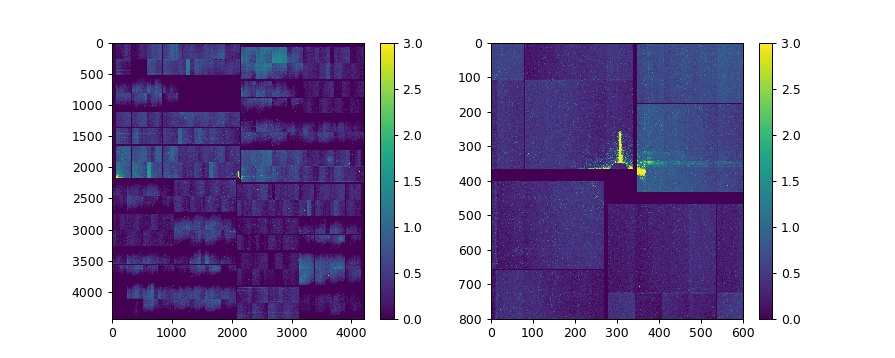

In [49]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.imshow(avg_img,aspect='auto',clim=[0,3])
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(avg_img[1800:2600,1800:2400],aspect='auto',clim=[0,3])
plt.colorbar()

plt.show()

In [54]:
bi,bf,db = -2,35,.01
bins = np.arange(bi,bf,db)
hy,hx = np.histogram(avg_img,bins=bins)
hx = hx[:-1]
hy = np.array(hy,dtype=float)/float(len(bins))

<IPython.core.display.Javascript object>


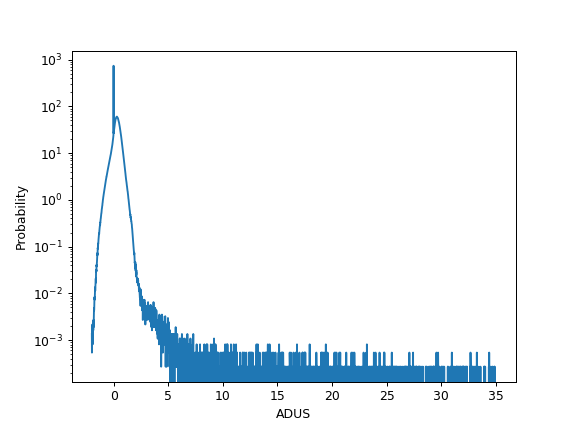

In [55]:
plt.figure()
plt.plot(hx,hy)
plt.yscale('log',nonposy='clip')
plt.ylabel('Probability')
plt.xlabel('ADUS')
plt.show()